In [1]:
import re
import numpy as np
import scipy.spatial.distance
from math import *
import matplotlib.pyplot as plt

In [2]:
sentences = []
with open('sentences.txt', 'r') as file:
    for line in file:
        sentences.append(line.lower())

In [3]:
words = []
for line in sentences:
    words.append(re.split('[^a-z]', line))

for i in range(len(words)):
    words[i] = list(filter(None, words[i]))

In [4]:
d = -1
my_dict = {}
set_of_words = set()
for line in words:
    set_of_words.update(set(line))
for word in set_of_words:
    d += 1
    my_dict[d] = word

In [5]:
n = len(words)
matrix = np.zeros(shape=(n,d))
for i in range(n):
    for j in range(d):
        matrix[i][j] = words[i].count(my_dict[j])

In [6]:
distances = []
for i in range(n):
    distances.append(scipy.spatial.distance.cosine(matrix[0], matrix[i]))

In [7]:
with open('submission-1.txt', 'w') as file:
    answer = '4 6'
    file.write(answer)

Second part

In [8]:
def f(x):
    return sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)
print("{} {}".format(f(1), f(15)))

3.252216865271419 0.6352214195786656


In [9]:
# w0 + w1x1 = y1
# w0 + w1x2 = y2
X = np.array([[1, 1],
             [1, 15]])
B = np.array([3.252216865271419, 0.6352214195786656])

W = np.linalg.solve(X, B)

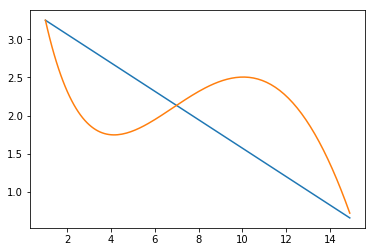

In [10]:
%matplotlib inline
x_to_show = np.arange(1, 15, 0.1)
y_to_show = [W[1] * i + W[0] for i in x_to_show]
plt.plot(x_to_show, y_to_show)
plt.plot(x_to_show, [f(x) for x in x_to_show])

In [11]:
# w0 + w1*x1 + w2*^2 = y1
X = np.array([[1, 1, 1],
              [1, 8, 64],
              [1, 15, 225]])
B = np.array([3.252216865271419, 2.316170159053224, 0.6352214195786656])

W =np.linalg.solve(X, B)

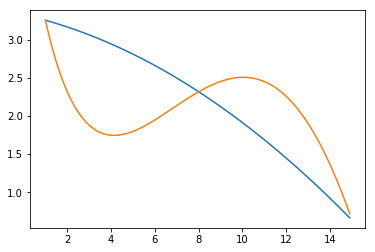

In [12]:
x_to_show = np.arange(1, 15, 0.1)
y_to_show = [W[0] + W[1] * i + W[2] * i * i for i in x_to_show]
plt.plot(x_to_show, y_to_show)
plt.plot(x_to_show, [f(x) for x in x_to_show])

In [13]:
# w0 + w1*x1 + w2*x1^2 + w3*x1^3 = y1
X = np.array([[1, 1, 1, 1],
              [1, 4, 16, 64],
              [1, 10, 100, 1000],
              [1, 15, 225, 15*225]])
B = np.array([3.252216865271419, 1.7468459495903677, 2.5054164070002463, 0.6352214195786656])

W =np.linalg.solve(X, B)

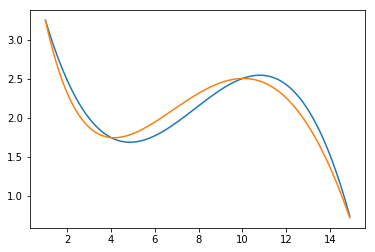

In [14]:
x_to_show = np.arange(1, 15, 0.1)
y_to_show = [W[0] + W[1] * i + W[2] * i * i + W[3] * (i**3) for i in x_to_show]
plt.plot(x_to_show, y_to_show)
plt.plot(x_to_show, [f(x) for x in x_to_show])

In [15]:
answer = "{} {} {} {}".format(W[0], W[1], W[2], W[3])
with open("submission-2.txt", 'w') as file:
    file.write(answer)